In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [81]:
filePath = input("Please enter file name: ")

file = open(filePath, "r")
lines = file.readlines()

df1 = ""
# splittng the line into individual data
flag1 = 2
for line in lines:
    if(" " in line):
        flag1 = 0
    elif("\t" in line):
        flag1 = 1
    break

if(flag1 == 0):
    for line in lines:
        df1 = pd.read_csv(filePath, sep = ' ', lineterminator = '\n', header = None)
elif(flag1 == 1):
    for line in lines:
        df1 = pd.read_csv(filePath, sep = '\t', lineterminator = '\n', header = None)
else:
    print("Data should be sperated by \t or single space!")
    
df2 = df1.copy()

(rownum,colnum) = (df2.shape)
distance_matrix = np.zeros((rownum, rownum))

for i in range(rownum):
    q1 = df2.iloc[i,2:].values
    for j in range(rownum):
        q2 = df2.iloc[j,2:].values
        distance_matrix[i][j] = np.linalg.norm(q1-q2)

Please enter file name: dbscan.txt


In [93]:
def DBSCAN(data,eps,minpts,visited,point_type):
    clusters = {}
    C = 0
    pt = point_type

    for i in range(0,data.shape[0]):#data.shape[0]):#4):
        if(visited[i]==0):
            visited[i] = 1
            P = i #df2.iloc[i,2:].values
            #print(data[P])
            neighb = regionQuery(P,eps,data) # return a list
            if(len(neighb)<minpts):
                pt[i] = -1
            else:
                C = C+1 # C = Next Cluster
                #clusters[C] = neighb
                expandCluster(P, neighb, C, eps, minpts,clusters,data,visited)
    return (clusters,pt)
          
def expandCluster(P, neighb, C, eps, minpts,clusters,data,visited):
    #add P to cluster C
    clusters[C] = [P];
    cnt = 0; temp_clusters = []; temp1_list = []
    
    for d1 in clusters:
        temp1_list.extend(list(set(clusters[d1])))
    
    for p1 in neighb:#each point P' in NeighborPts :
        if(visited[p1]==0):#P' is not visited
            visited[p1] = 1
            newneighbors = regionQuery(p1,eps,data)
            if(len(newneighbors)>=minpts):#sizeof(NeighborPts') >= MinPts
                #NeighborPts = NeighborPts joined with NeighborPts'
                for op1 in newneighbors:
                    if (op1 not in neighb):
                        neighb.append(op1)
                #expandCluster(p1, newneighbors, C, eps, minpts,clusters,data,visited)
        
        temp1_list.extend(list(set(neighb)))
        if p1 not in temp1_list:
            neighb.append(p1)
        #neighb.extend(temp_clusters)
        #t109 = list(set(neighb))
        #neighb = t109
    t2 = list(set(neighb))
    clusters[C].extend(t2)
    tepo = clusters[C]
    tepo = list(set(tepo))
    clusters[C] = tepo
    #clusters[C].extend(neighb)
    return                                                                   
          
def regionQuery(P, eps,data):
    list1 = [P]
    for lp in range(0,data.shape[0]):
        if(lp==P):
            continue
        else:
            if(data[P][lp]<eps):
                list1.append(lp)
    return list1

In [116]:
dist_mat = distance_matrix.copy()
visited = np.zeros(rownum)
point_type = np.zeros(rownum)
eps = float(input("Please enter the epsilon: "))
minpts = int(input("Please enter the min points: "))
ab12,pt = DBSCAN(dist_mat,eps,minpts,visited,point_type)

Please enter the epsilon: 0.3
Please enter the min points: 4


In [118]:
ab12.keys()

dict_keys([1, 2, 3, 4])


Jaccard Coefficient = 0.47924954665922725
Rand Index = 0.6914661157024793


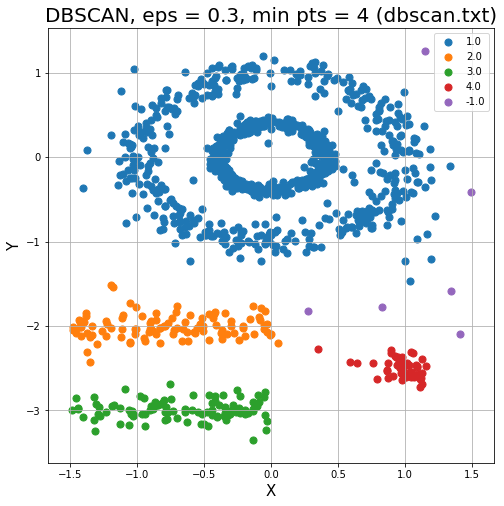

In [119]:
new_label = np.zeros(rownum)
for i in ab12:
    for j in ab12[i]:
        new_label[j] = i
for k in range(len(new_label)):
    if(new_label[k]==0):
        new_label[k] = -1
ldf = pd.DataFrame(new_label,columns=["Label"])

X_df = df2.iloc[:,2:].values
#X_df = StandardScaler().fit_transform(X_df)
if(df2.shape[1]>4):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X_df)
    principalDf = pd.DataFrame(data = principalComponents,columns = ['PC1', 'PC2'])
    finalDf = pd.concat([principalDf, ldf["Label"]], axis = 1)
    print()
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    titl1 = "DBSCAN, eps = "+str(eps)+", min pts = "+str(minpts)+" ("+str(filePath)+")"
    ax.set_title(titl1, fontsize = 20)
    targets = list(set(new_label))
    for target in targets:
        indicesToKeep = finalDf['Label'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'PC1'],finalDf.loc[indicesToKeep, 'PC2'], s = 50)
    ax.legend(targets)
    ax.grid()
elif(df2.shape[1]==4):
    dfnew = df2.iloc[:,2:4]
    dfnew.columns = ['X','Y']
    finalDf = pd.concat([dfnew, ldf["Label"]], axis = 1)
    print()
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('X', fontsize = 15)
    ax.set_ylabel('Y', fontsize = 15)
    titl1 = "DBSCAN, eps = "+str(eps)+", min pts = "+str(minpts)+" ("+str(filePath)+")"
    ax.set_title(titl1, fontsize = 20)
    targets = list(set(new_label))
    for target in targets:
        indicesToKeep = finalDf['Label'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'X'],finalDf.loc[indicesToKeep, 'Y'], s = 50)
    ax.legend(targets)
    ax.grid()
    
true_pos = 0
true_neg = 0
false_pos=0
false_neg=0
observed_truth = new_label
ground_truth = list(df2.iloc[:,1])
for i in range(df2.shape[0]):
    for j in range(df2.shape[0]):
        if ground_truth[i]==ground_truth[j]:
            if observed_truth[i]==observed_truth[j]:
                true_pos=true_pos+1
            else:
                false_neg=false_neg+1
        elif ground_truth[i]!=ground_truth[j]:
            if observed_truth[i]==observed_truth[j]:
                false_pos=false_pos+1
            else:
                true_neg=true_neg+1
jaccard_coeff = (true_pos)/(true_pos+false_pos+false_neg)
rand_index = (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
print("Jaccard Coefficient = "+str(jaccard_coeff))
print("Rand Index = "+str(rand_index))